# `Matplotlib`

It is worth understanding that there multiple ways to use `matplotlib`.  This flexibility, in my opinion, has led to a problematic and confusing mix of documentation and examples online.  For our learning purposes, I am going to focus on using the object orientated interface to `matplotlib`.  The abstraction offered via the OOP interface is the most pythonic, cleanest and easiest to follow (again in my opinion).  Once you have a good grasp of the approaches here I suspect you won't look back, but you will also be able to understand the, sometimes messy, examples you find in blogs and documentation online.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
DATA_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/RIVM_NL_provincial.csv'

In [4]:
def clean_covid_dataset(csv_path):
    '''
    Helper function to clean the netherlands covid dataset
    
    Params:
    -------
    csv_path: str
        Path to Dutch Covid CSV file
        
    Returns:
    -------
    pd.Dataframe
        Cleaned covid dataset in wide format
    '''    
    
    translated_names = {'Datum':'date', 
                        'Provincienaam':'province', 
                        'Provinciecode':'province_code', 
                        'Type':'metric', 
                        'Aantal':'n', 
                        'AantalCumulatief':'n_cum'}

    translated_metrics = {'metric': {'Overleden':'deaths',
                                     'Totaal':'total_cases',
                                     'Ziekenhuisopname':'hosp_admit'}}
    
    # method chaining solution.  Can be more readable
    df = (pd.read_csv(csv_path)
            .rename(columns=translated_names)
            .replace(translated_metrics)
            .fillna(value={'n': 0, 'n_cum': 0, 'province': 'overall'})
            .astype({'n': np.int32, 'n_cum': np.int32})
            .assign(date=lambda x: pd.to_datetime(x['date']),
                    metric=lambda x: pd.Categorical(x['metric']))
            .drop(['province_code'], axis=1)
            .pivot_table(columns=['metric'], 
                         index=['province','date'])
    )
        
    return df

In [5]:
neth_covid = clean_covid_dataset(DATA_URL)

In [6]:
## The components of `matplotlib` chart




## A first plot

Let's create a plot of positive cases reported in the netherlands.  The first thing we need to do is create a `Figure` object.  The constructor takes a number of parameters, but for our purposes the most useful on is `figsize` which sizes the plots using a 2d tuple.

```python
# create an instance of matplotlib.figure.Figure
fig = plt.figure(figsize=(12,3))
```

Now we have a figure we can create an `AxesSubplot` object.  This has all the useful methods attached to it that all us to visualise datasets and customise the plot.  We create an axes object by calling a method from the `Figure` object.

```python
# create an AxesSubplot
ax = fig.add_subplot()
```

You now have a figure `fig` and an axis subplot `ax`.  Try to get into the habbit of creating your plots this way.  These objects will come in very handy!  Put these two lines of code together and you get a blank plot.

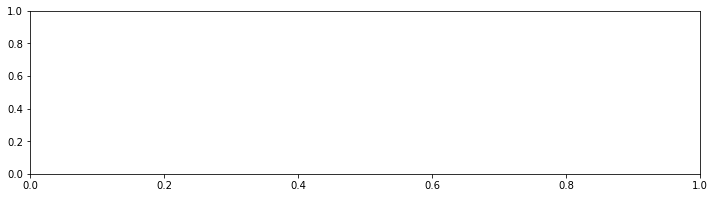

In [7]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

Let's assume we have the following dataset:
```python
dataset = [1, 2, 1, 2, 1]
```
To plot this data we can intuitively call the `plot` method of `ax` like so:

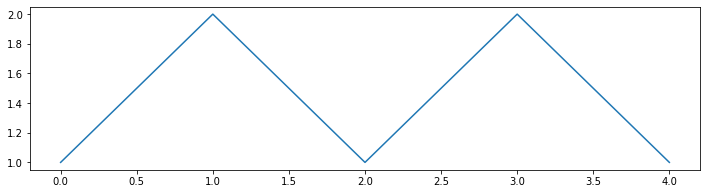

In [28]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
dataset = [1, 2, 1, 2, 1]

# plot in this case returns a 2D line plot object
line_plot = ax.plot(dataset)

The good news is that there is no real difference between plotting our simple data and a proper health data set.  For example to plot positive cases in `Groningen`:

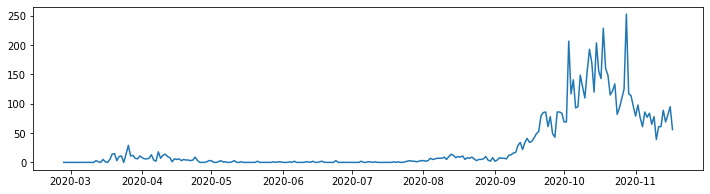

In [12]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

# using indexing to select gronigen and the daily number of cases
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'])

It is bad practice to exclude axis labels.  In true pythonic style setting the x and y labels is a simple operation.  We simply add the following code to our listing:

```python
# set x axis label
ax.set_xlabel("Date")

# set y axis label
ax.set_ylabel("Positive cases")
```

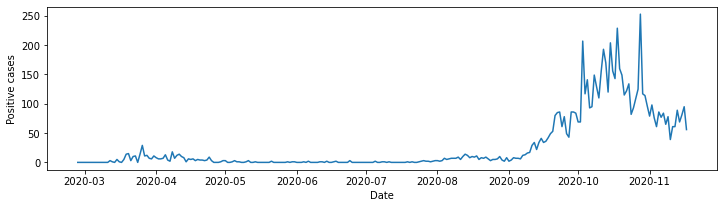

In [30]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.set_xlabel("Date")
ax.set_ylabel("Positive cases")
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'])

In [ ]:
Let's produce 

In [218]:
def plot_stacked_cases(sub_groups, labels, y_label):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot()
    ax.set_xlabel("Date")
    ax.set_ylabel(y_label)

    stk_plt = ax.stackplot(sub_groups[0].index, sub_groups, labels=labels)

    # add legend to the upper left of the plot
    fig.legend(loc='upper center', ncol=len(labels)//2)
    
    # remove padding from figure. 
    #fig.tight_layout()
    
    return fig, ax

TypeError: __init__() got an unexpected keyword argument 'ncols'

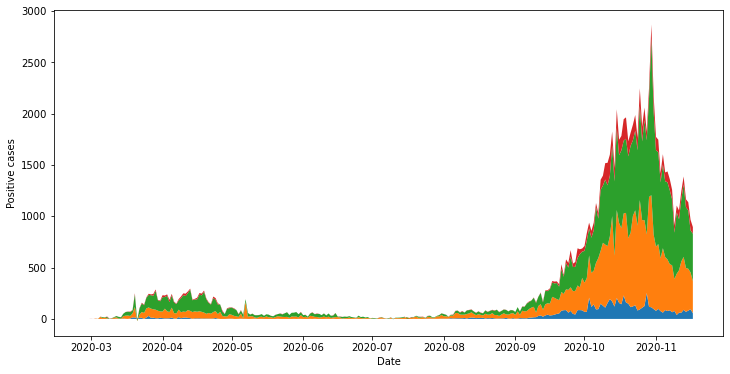

In [216]:
# create the analysis sub group
groningen = neth_covid.loc['Groningen']['n']['total_cases']
utrecht = neth_covid.loc['Utrecht']['n']['total_cases']
gelderland = neth_covid.loc['Gelderland']['n']['total_cases']
drenthe = neth_covid.loc['Drenthe']['n']['total_cases']
analysis_subgroup = [groningen, utrecht, gelderland, drenthe]
labels = ['groningen', 'utrecht', 'gelderland', 'drenthe']
fig, ax = plot_stacked_cases(analysis_subgroup, labels, "Positive cases")

ValueError: Automatic legend placement (loc='best') not implemented for figure legend.

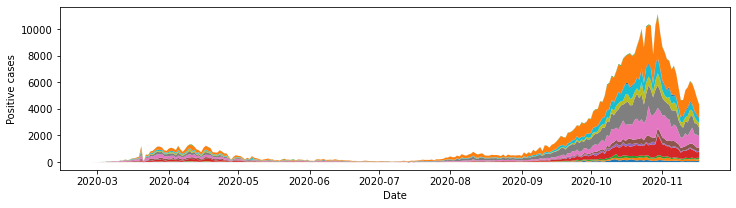

In [201]:
# drop the index and get the unique provinces.
provinces = neth_covid.reset_index()['province'].unique().tolist()
subgroups = []
for prov in provinces:
    subgroups.append(neth_covid.loc[prov]['n']['total_cases'])

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases")